# Data Preprocessing

The data is formatted as JSON separated by newline. Using pandas to read dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_json("./Software_5.json", lines=True)


The column vote tells us if the review is helpful or not. To better classifying our data, we want to remove all reviews that have no vote

In [12]:
dataframe = dataframe[dataframe['vote'].notna()]

Exploratory data analysis on overall rating column

In [13]:
dataframe["overall"].describe()


count    3902.000000
mean        3.367760
std         1.557351
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: overall, dtype: float64

Plotting pie chart and bar chart for overall score distribution. The 'overall' column has 5 labels: 1.0, 2.0, 3.0, 4.0, 5.0 where 1.0 is very bad, 3.0 is neutral and 5.0 is very good.

As can be seen, we have unbalanced data here with over 40% of reviews are very good, while only 11.7% of review is very bad

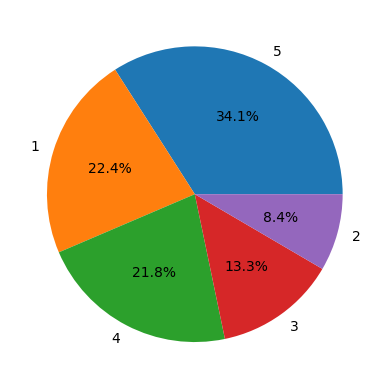

<AxesSubplot: >

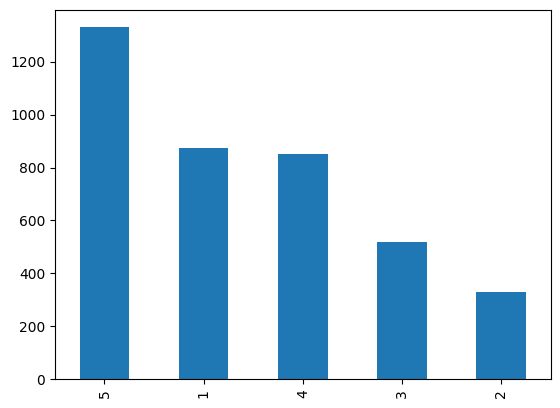

In [14]:
scores = dataframe["overall"].value_counts()
plt.pie(scores, labels=scores.index, autopct='%1.1f%%')
plt.show()

dataframe['overall'].value_counts().plot(kind='bar')

Now we look at review comments. We will do some preprocessing steps on the text

In [16]:
dataframe["reviewText"] = dataframe["reviewText"].apply(
    str.lower).apply(str.strip)


Now get the average review length and average review read time. To visualize this, we use a boxplot

Statistic of text length
 count     3902.000000
mean      1737.686315
std       2085.069985
min          3.000000
25%        562.250000
50%       1139.500000
75%       2197.500000
max      31643.000000
Name: reviewText, dtype: float64


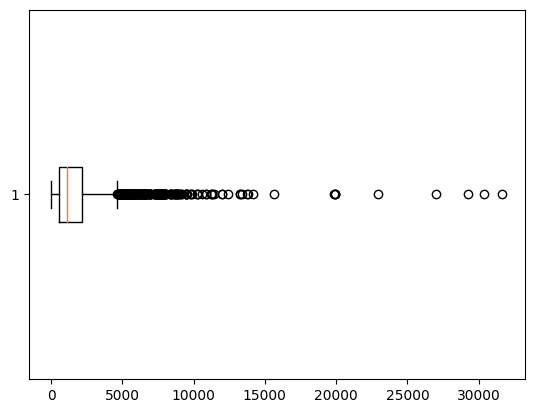

In [17]:
text_length = dataframe["reviewText"].apply(len)
print("Statistic of text length\n", text_length.describe())
# To visualize this, we use boxplot
plt.boxplot(text_length, vert=False)
plt.show()


Top 100 words in review text. Note that we also remove stop words here. Stop words are words that give little context to the sentence

In [18]:
from sklearn.feature_extraction import text

series = pd.Series(
    ' '.join(dataframe['reviewText']).split()).value_counts()[:100]

# Drop English stop words
series.drop(text.ENGLISH_STOP_WORDS, errors="ignore")



windows      4611
software     3867
use          3442
like         3305
just         3198
program      2853
new          2732
-            2640
version      2573
it's         2390
using        2157
don't        2109
time         2017
product      1877
used         1871
need         1773
really       1735
does         1678
computer     1671
want         1630
office       1600
i've         1548
good         1530
i'm          1529
it.          1513
work         1488
microsoft    1475
make         1453
video        1386
dtype: int64